In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# Iris data
iris = load_iris()  # load data
X = iris.data[:, 3:]  # data
y = iris.target  # target
class_names = iris.target_names  # Iris class names

mask = np.isin(iris.target, [0, 1])
X = X[mask]
y = y[mask]
class_names = class_names[0:2]

print(f'\nclass names: \n{class_names}')
print(f'\nfeature names: \n{iris.feature_names[3:]}')


class names: 
['setosa' 'versicolor']

feature names: 
['petal width (cm)']


In [3]:
# configs
output_dir = 'plots'  # output directory
os.makedirs(output_dir, exist_ok=True)

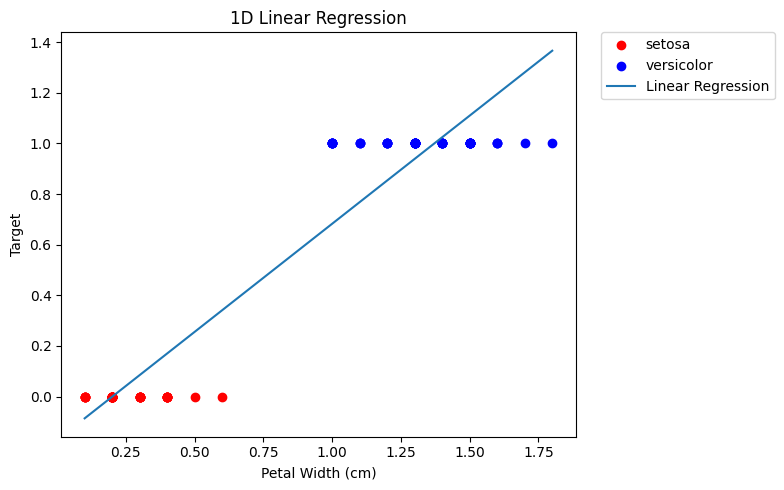

In [4]:
# linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
x_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_lin_pred = lin_reg.predict(x_test)

plt.figure(figsize=(8, 5))
plt.scatter(X[y == 0], y[y == 0], color='red', label=class_names[0])
plt.scatter(X[y == 1], y[y == 1], color='blue', label=class_names[1])
plt.plot(x_test, y_lin_pred, label='Linear Regression')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Target')
plt.title('1D Linear Regression')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'linear.webp'))
plt.show()
plt.close()

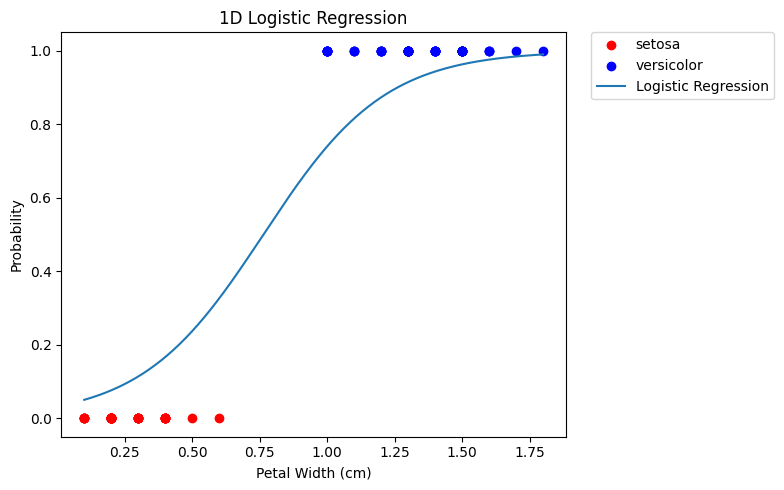

In [5]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_log_prob = log_reg.predict_proba(x_test)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(X[y == 0], y[y == 0], color='red', label=class_names[0])
plt.scatter(X[y == 1], y[y == 1], color='blue', label=class_names[1])
plt.plot(x_test, y_log_prob, label='Logistic Regression')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.title('1D Logistic Regression')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'logistic.webp'))
plt.show()
plt.close()

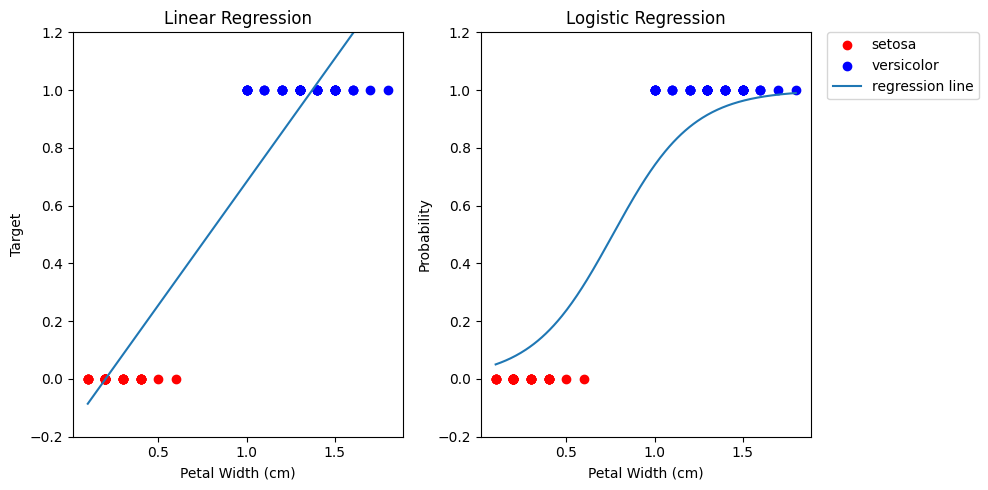

In [6]:
# combined
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# linear regression plot
axes[0].set_ylim(-0.2, 1.2)
axes[0].scatter(X[y == 0], y[y == 0], color='red', label=class_names[0])
axes[0].scatter(X[y == 1], y[y == 1], color='blue', label=class_names[1])
axes[0].plot(x_test, y_lin_pred)
axes[0].set_xlabel('Petal Width (cm)')
axes[0].set_ylabel('Target')
axes[0].set_title('Linear Regression')

# logistic regression plot
axes[1].set_ylim(-0.2, 1.2)
axes[1].scatter(X[y == 0], y[y == 0], color='red', label=class_names[0])
axes[1].scatter(X[y == 1], y[y == 1], color='blue', label=class_names[1])
axes[1].plot(x_test, y_log_prob, label='regression line')
axes[1].set_xlabel('Petal Width (cm)')
axes[1].set_ylabel('Probability')
axes[1].set_title('Logistic Regression')

# output
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'linear_logistic.webp'))
plt.show()
plt.close()